In [95]:
import pandas as pd
import re
import string
import nltk
import ssl
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [96]:
# !pip install openpyxl Ìï¥ÏïºÌï®

file_path = 'C:/Users/USER/OneDrive - Í∏àÏò§Í≥µÍ≥ºÎåÄÌïôÍµê/02_Ïó∞Íµ¨Ïã§/02_ÍπÄÎØºÏ§ÄÍµêÏàòÎãò/2_data\ROBLOX_DATA_PS.xlsx'

df = pd.read_excel(file_path, engine='openpyxl')

print(df.head())

                               reviewId             userName  \
0  8b33921b-b971-49ad-9c43-5f46535d8481       Rhylenn Taylor   
1  ddfa4628-ecd7-403d-b4f8-976655986017      Addalaide Clark   
2  8d9d55dd-df25-4329-af58-2178007c5434  jennavie kajornklin   
3  493e1a17-3af8-4e60-b5d2-a1f9f1056355              Josilyn   
4  4ac6c4f5-c019-46f0-b829-8e98d19a93ea                  Eli   

                                             content  score  thumbsUpCount  \
0  Perfect App! Though, There are a few problems ...      5            609   
1  I love this game. I have so much fun playing w...      4           1384   
2  Roblox is my favorite game. But when I play on...      4            576   
3  This game is great, amazing almost. But my sit...      1            166   
4  been glitching and completely freezing in the ...      1            143   

  reviewCreatedVersion                  at appVersion  
0            2.578.564 2023-06-24 03:07:01  2.578.564  
1            2.578.564 2023-06-25 

In [97]:
duplicates = df[df.duplicated(subset=['reviewId', 'at', 'content', 'score'], keep=False)]
print(f"Ï§ëÎ≥µÎêú Ìñâ Ïàò: {len(duplicates)}")

if not duplicates.empty:
    df = df.drop_duplicates(subset=['reviewId', 'at', 'content', 'score'], keep='first')
    print("Ï§ëÎ≥µÎêú ÌñâÏùÑ Ï†úÍ±∞ÌñàÏäµÎãàÎã§.")
else:
    print("Ï§ëÎ≥µÎêú ÌñâÏù¥ ÏóÜÏäµÎãàÎã§.")

Ï§ëÎ≥µÎêú Ìñâ Ïàò: 0
Ï§ëÎ≥µÎêú ÌñâÏù¥ ÏóÜÏäµÎãàÎã§.


In [98]:
# NLTK Îã§Ïö¥Î°úÎìú ÏÑ§Ï†ï
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Ïù¥Î™®ÏßÄ Ï†úÍ±∞, ÌíàÏÇ¨ ÌÉúÍπÖ, ÏÜåÎ¨∏Ïûê, ÎßàÏπ®Ìëú, Î∂àÏö©Ïñ¥, ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú Ìï®Ïàò

In [99]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Î™ÖÏÇ¨Îßå Ï∂îÏ∂úÌï†Í±∞Îùº ÏóÜÏñ¥ÎèÑ Îê®
def get_wordnet_pos(tag):
    if tag.startswith('J'): # ÌòïÏö©ÏÇ¨
        return 'a'
    elif tag.startswith('V'): 
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'): # Î∂ÄÏÇ¨
        return 'r'
    else:
        return 'n'

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = remove_emoji(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tagged_tokens = pos_tag(tokens)
    
    # Ïó¨Í∏∞ÏÑú Î™ÖÏÇ¨Îßå ÏÑ†ÌÉù
    nouns = [word for word, tag in tagged_tokens if tag.startswith("NN")]
    
    # Î™ÖÏÇ¨Îßå ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú
    lemmatized_nouns = [lemmatizer.lemmatize(word, 'n') for word in nouns]
    return lemmatized_nouns

In [100]:
# ÌÜ†ÌÅ∞Ìôî, ÌÜ†ÌÅ∞Ìôî ÌõÑ 10 ÌÜ†ÌÅ∞ ÎØ∏Îßå Î¨∏Ïû• Ï†úÍ±∞
df['tokens'] = df['content'].apply(preprocess_text)
df['token_count'] = df['tokens'].apply(len)
df_filtered = df[df['token_count'] >= 10].copy()

print(df_filtered.head())

                               reviewId             userName  \
0  8b33921b-b971-49ad-9c43-5f46535d8481       Rhylenn Taylor   
1  ddfa4628-ecd7-403d-b4f8-976655986017      Addalaide Clark   
2  8d9d55dd-df25-4329-af58-2178007c5434  jennavie kajornklin   
3  493e1a17-3af8-4e60-b5d2-a1f9f1056355              Josilyn   
4  4ac6c4f5-c019-46f0-b829-8e98d19a93ea                  Eli   

                                             content  score  thumbsUpCount  \
0  Perfect App! Though, There are a few problems ...      5            609   
1  I love this game. I have so much fun playing w...      4           1384   
2  Roblox is my favorite game. But when I play on...      4            576   
3  This game is great, amazing almost. But my sit...      1            166   
4  been glitching and completely freezing in the ...      1            143   

  reviewCreatedVersion                  at appVersion  \
0            2.578.564 2023-06-24 03:07:01  2.578.564   
1            2.578.564 2023-06-2

gensim ÏÑ§Ïπò ÏïàÎê†Îïå  
import sys  
print(sys.executable)

In [101]:
# LDA
# condaÏóêÏÑú ÏÑ§Ïπò, conda install -c conda-forge gensim
import gensim
from gensim import corpora
from gensim.models import LdaModel

texts = df_filtered['tokens'].tolist() # Í∞Å Î¨∏Ïû•ÏùÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùò Î¶¨Ïä§Ìä∏Î°ú Ï∂îÏ∂ú
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts] # bag of word ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò


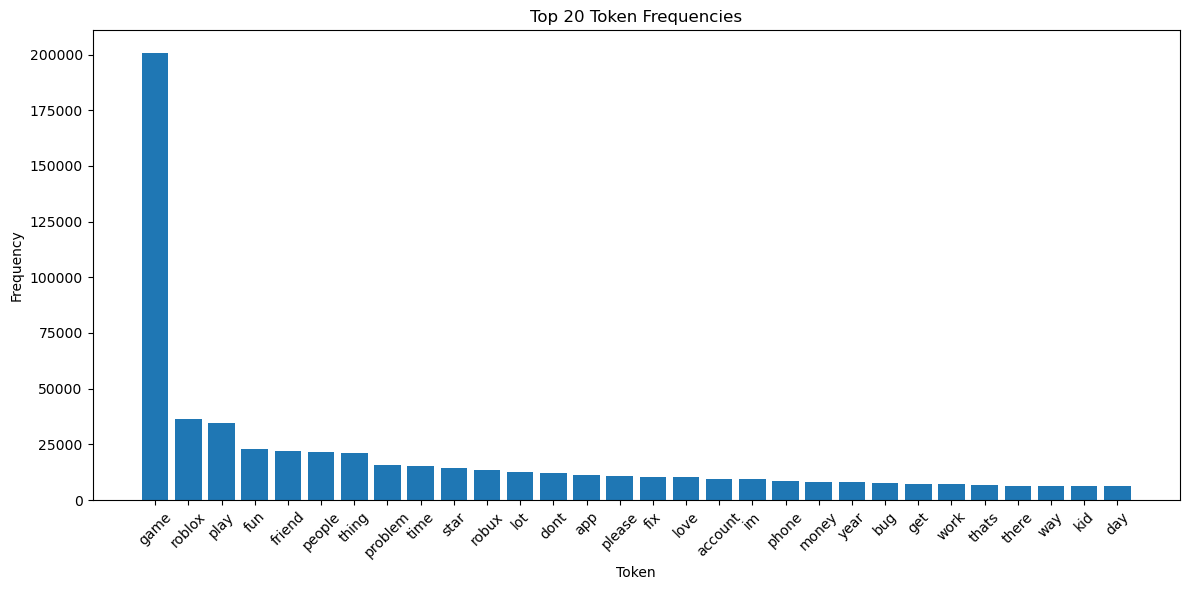

In [102]:
import matplotlib.pyplot as plt
from collections import Counter

# Î™®Îì† ÌÜ†ÌÅ∞ÏùÑ ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Î°ú Ìï©ÏπòÍ∏∞
all_tokens = [token for tokens in df_filtered['tokens'] for token in tokens]

# ÌÜ†ÌÅ∞ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
token_counts = Counter(all_tokens)

# ÏÉÅÏúÑ 30Í∞ú ÌÜ†ÌÅ∞ Ï∂îÏ∂ú
most_common = token_counts.most_common(30)
words, counts = zip(*most_common)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Token Frequencies")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


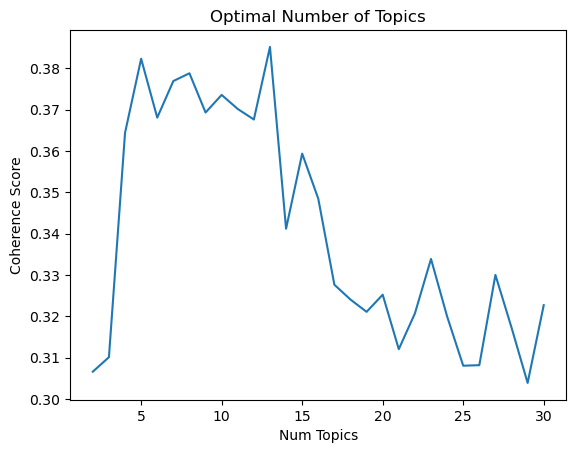

Best num_topics = 13, coherence = 0.3852


In [103]:
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         passes=10,
                         random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
start, limit, step = 2, 31, 1  # ÌÜ†ÌîΩ Í∞úÏàò: 2 ~ 30

# Ïã§Ìñâ
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

# ÏãúÍ∞ÅÌôî
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# ÏµúÍ≥† coherence Í∞íÏùÑ Í∞ÄÏßÑ Î™®Îç∏ ÌôïÏù∏
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
print(f"Best num_topics = {x[optimal_index]}, coherence = {coherence_values[optimal_index]:.4f}")


In [104]:
# Î™®Îç∏ 1: ÌÜ†ÌîΩ Í∞úÏàò 5Í∞ú
lda_model_1 = LdaModel(corpus=corpus,
                       id2word=dictionary,
                       num_topics=5,
                       passes=10,
                       random_state=42)

# Î™®Îç∏ 2: ÌÜ†ÌîΩ Í∞úÏàò 13Í∞ú
lda_model_2 = LdaModel(corpus=corpus,
                       id2word=dictionary,
                       num_topics=13,
                       passes=10,
                       random_state=42)

In [105]:
# üîπ Î™®Îç∏ 1: ÌÜ†ÌîΩ 5Í∞ú
topic_keywords_1 = []
for i in range(5):
    words = lda_model_1.show_topic(i, topn=15)
    keywords = [word for word, _ in words]
    topic_keywords_1.append(keywords)

print("[Î™®Îç∏ 1] ÌÜ†ÌîΩ 5Í∞ú:")
for idx, kw in enumerate(topic_keywords_1):
    print(f"Topic {idx+1} keywords:", kw)


# üîπ Î™®Îç∏ 2: ÌÜ†ÌîΩ 13Í∞ú
topic_keywords_2 = []
for i in range(13):
    words = lda_model_2.show_topic(i, topn=15)
    keywords = [word for word, _ in words]
    topic_keywords_2.append(keywords)

print("\n[Î™®Îç∏ 2] ÌÜ†ÌîΩ 13Í∞ú:")
for idx, kw in enumerate(topic_keywords_2):
    print(f"Topic {idx+1} keywords:", kw)

[Î™®Îç∏ 1] ÌÜ†ÌîΩ 5Í∞ú:
Topic 1 keywords: ['robux', 'money', 'game', 'thing', 'dont', 'buy', 'get', 'people', 'stuff', 'roblox', 'cost', 'pay', 'item', 'house', 'avatar']
Topic 2 keywords: ['game', 'roblox', 'fix', 'play', 'please', 'problem', 'star', 'im', 'pls', 'bug', 'time', 'cant', 'glitch', 'work', 'lag']
Topic 3 keywords: ['game', 'play', 'roblox', 'fun', 'friend', 'people', 'love', 'thing', 'lot', 'kid', 'star', 'dont', 'app', 'time', 'thats']
Topic 4 keywords: ['phone', 'play', 'computer', 'pc', 'tablet', 'app', 'brother', 'sister', 'download', 'device', 'cousin', 'space', 'cant', 'use', 'update']
Topic 5 keywords: ['account', 'log', 'password', 'roblox', 'help', 'please', 'work', 'time', 'cant', 'number', 'didnt', 'name', 'day', 'im', 'sign']

[Î™®Îç∏ 2] ÌÜ†ÌîΩ 13Í∞ú:
Topic 1 keywords: ['item', 'clothes', 'price', 'anyways', 'r', 'shirt', 'event', 'avatar', 'hair', 'dollar', 'ppl', 'hashtags', 'face', 'buying', 'refund']
Topic 2 keywords: ['glitch', 'bug', 'screen', 'move', '

### ÏµúÏ¢Ö LDA

In [106]:
# 1. ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
custom_stopwords = [
    'thing', 'get', 'make', 'lot', 'way', 'dont', 'pls', 'plz', 'please',
    'im', "i'm", 'u', 'alot', 'sooo', 'yea',
    'today', 'day', 'time', 'year', 'month', 'week',
    'ppl', 'people',
    'game', 'robux', 'roblox'
    'cant', 'star', 'thats', 'bye', 'there', 'cool', 'something', 'didnt', 'someone', 'reason', 'play', 'fun', 'problem', 'love', 'lol',
    'thx', 'roblox', 'l' 
]

# ‚úÖ accÎ•º accountÎ°ú ÏπòÌôò
texts = [[("account" if word == "acc" else word) for word in doc] for doc in texts]

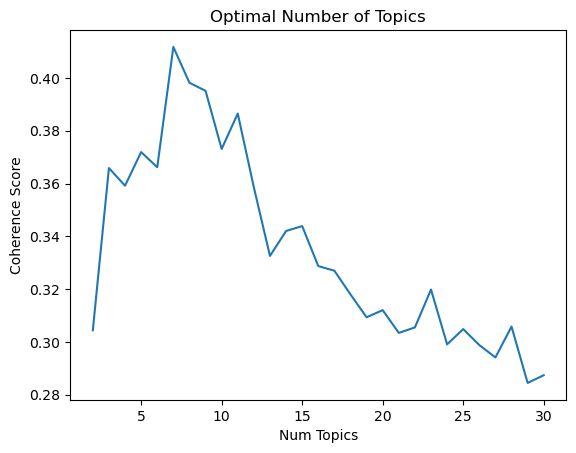

In [107]:
import copy

# 2. Í∏∞Ï°¥ dictionary Î≥µÏÇ¨ ÌõÑ Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ‚Üí dictionary_final
dictionary_final = copy.deepcopy(dictionary)
stopword_ids = [dictionary_final.token2id[word] for word in custom_stopwords if word in dictionary_final.token2id]
dictionary_final.filter_tokens(bad_ids=stopword_ids)
dictionary_final.compactify()

# 3. corpus_final Ïû¨ÏÉùÏÑ± (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ Í∏∞Ï§Ä)
corpus_final = [dictionary_final.doc2bow(text) for text in texts]

# 4. coherence Í≥ÑÏÇ∞ Ìï®Ïàò Ï†ïÏùò
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         passes=10,
                         random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts, 
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# 5. ÌÜ†ÌîΩ Í∞úÏàò Î≤îÏúÑ ÏÑ§Ï†ï Î∞è Ïã§Ìñâ
start, limit, step = 2, 31, 1
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary_final,
    corpus=corpus_final,
    texts=texts,
    start=start,
    limit=limit,
    step=step
)

# 6. ÏãúÍ∞ÅÌôî
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

In [146]:
# 7. ÏµúÍ≥† coherence Î™®Îç∏ ÏÑ†ÌÉù (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Î∞òÏòÅ)
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]
optimal_num_topics = range(start, limit, step)[optimal_index]

# 8. ÏµúÏ†Å ÌÜ†ÌîΩ Ïàò Í∏∞Ï§Ä Î™®Îç∏ÏóêÏÑú ÌÜ†ÌîΩ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
topic_keywords = []
for i in range(7):
    words = optimal_model.show_topic(i, topn=15)
    keywords = [word for word, _ in words]
    topic_keywords.append(keywords)

# 9. Ï∂úÎ†•
print(f"Optimal Model: 7 Topics")
for idx, kw in enumerate(topic_keywords):
    print(f"Topic {idx+1} keywords:", kw)

Optimal Model: 7 Topics
Topic 1 keywords: ['hacker', 'player', 'report', 'internet', 'scammer', 'daters', 'thank', 'guy', 'online', 'nothing', 'creator', 'yeah', 'rate', 'minecraft', 'work']
Topic 2 keywords: ['friend', 'app', 'word', 'life', 'family', 'bloxburg', 'world', 'download', 'number', 'kid', 'everyone', 'playing', 'tag', 'tycoon', 'million']
Topic 3 keywords: ['fix', 'bug', 'glitch', 'join', 'screen', 'move', 'camera', 'cant', 'button', 'lag', 'rate', 'try', 'server', 'press', 'kick']
Topic 4 keywords: ['account', 'log', 'password', 'fix', 'cant', 'work', 'help', 'let', 'try', 'connection', 'error', 'sign', 'name', 'change', 'phone']
Topic 5 keywords: ['money', 'kid', 'buy', 'stuff', 'avatar', 'cost', 'pay', 'child', 'item', 'clothes', 'parent', 'change', 'everything', 'need', 'use']
Topic 6 keywords: ['app', 'update', 'download', 'pet', 'wifi', 'load', 'hour', 'space', 'car', 'work', 'hate', 'house', 'store', 'adopt', 'cant']
Topic 7 keywords: ['phone', 'cause', 'lag', 'comp

In [109]:
from gensim.models import Word2Vec

# Word2Vec Î™®Îç∏ ÌïôÏäµ
w2v_model = Word2Vec(
    sentences=texts,  
    vector_size=100,  
    window=5,         
    min_count=5,      
    workers=4,       
    sg=1              
)

In [132]:
nltk.download('averaged_perceptron_tagger')

# 1. Î™ÖÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅÌïòÎäî Ìï®Ïàò
def filter_nouns(word_list):
    tagged = pos_tag(word_list)
    nouns = [word for word, pos in tagged if pos.startswith('NN')]  # NN, NNS, NNP, NNPS
    return nouns

# 2. Word2Vec Í∏∞Î∞ò Ïú†ÏÇ¨Ïñ¥ ÌôïÏû• Ìï®Ïàò
def expand_keywords_with_word2vec(keywords, model, topn=5):
    expanded = set(keywords)
    for word in keywords:
        if word in model.wv.key_to_index:
            similar_words = model.wv.most_similar(word, topn=topn)
            for sim_word, _ in similar_words:
                expanded.add(sim_word)
    return list(expanded)

# 3. Í∞Å ÌÜ†ÌîΩÎ≥ÑÎ°ú ÌôïÏû• + Î™ÖÏÇ¨ ÌïÑÌÑ∞ÎßÅ
expanded_topic_keywords = []
for topic in topic_keywords:
    expanded = expand_keywords_with_word2vec(topic, w2v_model, topn=3)
    nouns_only = filter_nouns(expanded)
    expanded_topic_keywords.append(nouns_only)

# 4. Í≤∞Í≥º Ï∂úÎ†•
for idx, kw in enumerate(expanded_topic_keywords):
    print(f"Topic {idx+1} (Î™ÖÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅÌïú ÌôïÏû• Ìè¨Ìï® keywords):")
    print(kw)

Topic 1 (Î™ÖÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅÌïú ÌôïÏû• Ìè¨Ìï® keywords):
['reveiw', 'exploiter', 'maker', 'jenna', 'minecraft', 'downfall', 'odersonline', 'rating', 'ty', 'nothing', 'internet', 'hacker', 'daters', 'deliver', 'player', 'oder', 'rate', 'effort', 'connection', 'dater', 'byebye', 'thank', 'thankyou', 'sombody', 'hehe', 'thats', 'creator', 'punishment', 'router', 'guy', 'peace', 'gta', 'yeah', 'wifi', 'creaters', 'deserves', 'advantage', 'moderator', 'scamers', 'consequence', 'work', 'everythings', 'dose']
Topic 2 (Î™ÖÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅÌïú ÌôïÏû• Ìè¨Ìï® keywords):
['friendsand', 'tycoon', 'cuss', 'mall', 'bay', 'robloxi', 'curse', 'app', 'superhero', 'explore', 'tag', 'classmate', 'socialize', 'bloxburg', 'bloxberg', 'world', 'wolf', 'dowload', 'patient', 'word', 'bond', 'adresses', 'hastags', 'iv', 'friend', 'relax', 'sentence', 'everybody', 'everyone', 'journey', 'kid', 'life', 'ben', 'teenager', 'simulaters', 'family', 'roblx', 'number']
Topic 3 (Î™ÖÏÇ¨Îßå ÌïÑÌÑ∞ÎßÅÌïú ÌôïÏû• Ìè¨Ìï® keywo

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
custom_stopwords2 = [
    'fixe', 'thisbut', 'amazingbut', 'problemthe', 'editit', 'delivers', 'gamesi', 'gamesits',
    'friendsi', 'funyou', 'fivestar', 'leaf', 'thr', 'app', 'appi', 'idc',
    'ü•∞', '‚ô°', '‚≠ê', 'star', 'playi', 'ware', 'verity', 'reson', 'chang', 'didnt',
    'wasnt', 'couldnt', 'agin', 'ir', 'dosnt', 'respond',
    'thing', 'something', 'ty', 'nothing', 'thank', 'thankyou', 'hehe', 'yeah', 'byebye', 'peace',
    'guy', 'wifi', 'router', 'dose', 'everythings', 'deserves',
    'iv', 'number', 'everybody', 'everyone', 'life', 'word', 'sentence',
    'roblux', 'roblx', 'everything', 'somethings',
    'fixe', 'thisbut', 'amazingbut', 'problemthe', 'editit', 'delivers', 'gamesi', 'gamesits',
    'friendsi', 'funyou', 'fivestar', 'leaf', 'thr', 'app', 'appi', 'idc',
    'ü•∞', '‚ô°', '‚≠ê', 'star', 'playi', 'ware', 'verity', 'reson', 'chang', 'didnt',
    'wasnt', 'couldnt', 'agin', 'ir', 'dosnt', 'respond', 'deliver', 'log',
    'sign', 'thing', 'something', 'id17', 'it‚ù§', 'reveiw', 'rating', 'rate', 'sombody', 'thats', 'robloxi', 'screenit', 'lg', 'gta', 'sits', 'alt', 'mb', 'bay', 'jenna', 
    'odersonline', 'effort', 'player', 'punishment', 'consequence', 'advantage', 'oder', 'ig', 'eh', 'min', 'spec' ,'awhile'
]

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_custom_stopwords2(keywords, stopwords):
    return [word for word in keywords if word not in stopwords]

# Ï†ÅÏö©
filtered_topic_keywords = []
for topic in expanded_topic_keywords:
    filtered = remove_custom_stopwords2(topic, custom_stopwords2)
    filtered_topic_keywords.append(filtered)

# Í≤∞Í≥º Ï∂úÎ†•
for idx, kw in enumerate(filtered_topic_keywords):
    print(f"Topic {idx+1} (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ):")
    print(kw)


Topic 1 (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ):
['exploiter', 'maker', 'minecraft', 'downfall', 'internet', 'hacker', 'daters', 'connection', 'dater', 'creator', 'creaters', 'moderator', 'scamers', 'work']
Topic 2 (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ):
['friendsand', 'tycoon', 'cuss', 'mall', 'curse', 'superhero', 'explore', 'tag', 'classmate', 'socialize', 'bloxburg', 'bloxberg', 'world', 'wolf', 'dowload', 'patient', 'bond', 'adresses', 'hastags', 'friend', 'relax', 'journey', 'kid', 'ben', 'teenager', 'simulaters', 'family']
Topic 3 (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ):
['camera', 'swipe', 'press', 'zoom', 'screen', 'beg', 'lag', 'botton', 'sever', 'bug', 'tap', 'inout', 'glitch', 'button', 'repair', 'connect', 'stucks', 'join', 'server', 'severs', 'restarts', 'spike', 'kickes', 'move', 'kick']
Topic 4 (Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ):
['reply', 'beg', 'account', 'help', 'gadget', 'error', 'internet', 'situation', 'change', 'phone', 'tablet', 'repair', 'connection', 'display', 'password', 'fix', 'pasword', 'conection', 'login', 'sends',

In [143]:
# VADER Îã§Ïö¥Î°úÎìú
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ: df
# - df['content']: Î¶¨Î∑∞ ÌÖçÏä§Ìä∏
# - df['score']: 1~5 ÌèâÏ†ê
# - expanded_topic_keywords_filtered: Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ topic1~9 ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏

review_feature_scores = []

for texts in df['content']:
    row_scores = []
    for keywords in filtered_topic_keywords:  # topic1~9
        if any(kw in texts for kw in keywords):
            # Ìï¥Îãπ ÌÜ†ÌîΩ ÌÇ§ÏõåÎìú Ï§ë ÌïòÎÇòÎùºÎèÑ Î¶¨Î∑∞Ïóê ÏûàÏúºÎ©¥ Í∞êÏÑ± Ï†êÏàò Ï∏°Ï†ï
            score = analyzer.polarity_scores(texts)['compound']
        else:
            score = 0.0
        row_scores.append(round(score, 2))  # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨
    review_feature_scores.append(row_scores)

# Í≤∞Í≥º DataFrameÏúºÎ°ú Ï†ÄÏû•
features_df = pd.DataFrame(review_feature_scores, columns=[f'f{i+1}' for i in range(7)])
features_df.insert(0, "No.", range(1, len(features_df) + 1))  # No. Ï∂îÍ∞Ä

# ÌèâÏ†ê Ïù¥ÏßÑÌôî (score ‚â• 4 ‚Üí 1, else 0)
features_df['Overall Rating'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [144]:
features_df.head()

No.    f1    f2    f3    f4    f5    f6    f7  Overall Rating
0    1 -0.51  0.00 -0.51  0.00  0.00  0.00 -0.51               1
1    2  0.00  0.73  0.73  0.73  0.73  0.00  0.73               1
2    3  0.00  0.00 -0.45 -0.45 -0.45 -0.45 -0.45               1
3    4  0.32  0.00  0.00  0.32  0.00  0.32  0.32               0
4    5  0.00 -0.02 -0.02 -0.02  0.00  0.00 -0.02               0

In [145]:
import statsmodels.api as sm

# ÏûÖÎ†• Î≥ÄÏàò: f1 ~ f9 (ÎòêÎäî Ïã§Ï†ú ÏÇ¨Ïö©Ìïú feature ÏàòÏóê ÎßûÍ≤å Ï°∞Ï†ï)
X = features_df[[f"f{i+1}" for i in range(7)]]

# Ï†àÌé∏Ìï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# Ï∂úÎ†• Î≥ÄÏàò: Overall Rating
y = features_df["Overall Rating"]

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Ï†ÅÌï©
model = sm.Logit(y, X)
result = model.fit()

# ÏöîÏïΩ Ï∂úÎ†•
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459946
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Overall Rating   No. Observations:               235755
Model:                          Logit   Df Residuals:                   235747
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Jul 2025   Pseudo R-squ.:                 0.06885
Time:                        14:31:16   Log-Likelihood:            -1.0843e+05
converged:                       True   LL-Null:                   -1.1645e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0587      0.006    182.180      0.000       1.047       1.070
f1            -0.1328      0.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # ‚úÖ Ï∂îÍ∞ÄÌï¥Ïïº Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Í∞ÄÎä•

# 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Î™®Îç∏ ÌïôÏäµ
model = sm.Logit(y_train, X_train)
result = model.fit()

# 3. ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ
y_pred_test = (result.predict(X_test) >= 0.5).astype(int)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Optimization terminated successfully.
         Current function value: 0.536361
         Iterations 7
Test Accuracy: 0.7935780789378805
